In [48]:
import pandas as pd
import plotly.express as px
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import imgkit

In [49]:
# Getting DF
tweetsdf = pd.read_csv('../data/finalScores.csv').dropna(subset=['score'])
tweetsdf = tweetsdf.iloc[:,2:]
tweetsdf.head()

,date,tweet,user_id,latitude,longitude,hashtags,original_tweet,score
0,2006-09-10 11:07:07,trying to figure out what this thing is,5622.0,39.1413,-84.506,NaN,trying to figure out what this thing is.,4.154872
1,2007-03-17 09:59:46,killing my land line,5622.0,39.1413,-84.506,NaN,killing my land line.,4.375000
2,2007-03-18 11:48:24,my expense report,5622.0,39.1413,-84.506,NaN,my expense report,4.275294
3,2007-03-21 12:20:05,putting down the llama book,5622.0,39.1413,-84.506,NaN,putting down the llama book.,4.258095
5,2007-04-23 16:33:41,releasing final art,5622.0,39.1413,-84.506,NaN,Releasing Final Art.,4.528889


In [ ]:
tweetsdf.dropna(subset=['hashtags'])

,date,tweet,user_id,latitude,longitude,hashtags,original_tweet,score
94,2009-10-24 19:53:09,school of cock,753393.0,34.11410,-118.4068,oneletteroffmovies,@SarahKSilverman School of Cock #oneletteroffm...,4.192857
315,2007-03-23 01:56:29,bomb this wont happen again i promise,1983121.0,45.31090,-122.7702,1,"Bomb #1, This wont happen again, I promise!",4.245946
317,2007-03-23 01:56:30,bomb this wont happen again i promise,1983121.0,45.31090,-122.7702,2,"Bomb #2, This wont happen again, I promise!",4.245946
355,2009-05-13 13:38:06,im sure im late with this but here you go,1925401.0,42.38890,-71.2423,imw051309,@gregorysimpson i'm sure i'm late with this bu...,3.956098
363,2009-06-20 09:45:55,i also want to send support to everyone in ira...,1925401.0,42.38890,-71.2423,teaparty,@jillwhalen i also want to send support to eve...,4.078384
...,...,...,...,...,...,...,...,...
8681398,2010-03-16 12:17:28,trt shay was whoopin dat assstop lyin lol,58669408.0,43.02179,-83.6757,whenifirstmet,TRT @kyekye22: #whenifirstmet @DineroMEECH Sha...,4.132727
8681399,2010-03-16 12:17:51,rt he blew the games for us at this tournament...,58669408.0,43.02179,-83.6757,wheniirstmet,RT @smittylu: #wheniirstmet @DineroMEECH he bl...,3.944815
8681415,2010-03-16 12:58:33,just saw measurements that is i need see th...,58669408.0,43.02179,-83.6757,unreal,Just saw @cherokeedassxxx measurements: 36-29-...,4.091636
8681423,2010-03-16 13:19:24,rtdineromeech it was at my hotel partyi though...,58669408.0,43.02179,-83.6757,"whenifirstmet,nolie",RT @CharmaineBryant: #WhenIFirstMet-->>@Dinero...,3.905769


KeyboardInterrupt: 

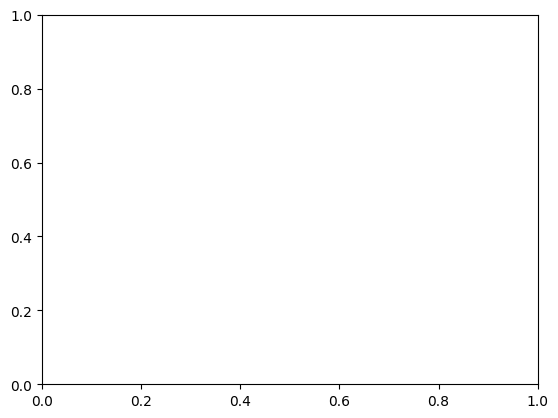

In [5]:
plt.hist(tweetsdf.dropna(subset=['hashtags'])['date'])
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2009-01-01'), pd.Timestamp('2010-07-31'))
plt.show()

In [50]:
# Converting date field to datetime object
tweetsdf['date'] = pd.to_datetime(tweetsdf['date'])

## Analyzing Positive Event Impact
Positive events:
- Christmas/Holiday season 2009 
- October 2009 NASA launching Ares-I X Mission 
- Fourth of July 2009 Statue of Liberty reopening
- 2010 Winter Olympics

In [51]:
# Dates/Starts of positive events
positiveEventDates = {
    'christmas': pd.Timestamp('2009-12-25'),
    'nasa': pd.Timestamp('2009-10-28'),
    'liberty': pd.Timestamp('2009-07-04'),
    'olympics': pd.Timestamp('2010-02-12')
}

In [52]:
def plotAvgHappiness(event, keywords, eventName, offset:int = 14, tweetsdf:pd.DataFrame =  tweetsdf, positiveEventDates:dict = positiveEventDates):
    dateOffset = pd.DateOffset(days=offset)
    # Filtering for tweets that are within two weeks of event
    filteredTweets = tweetsdf[(tweetsdf['date'] >= (positiveEventDates[event] - dateOffset)) & (tweetsdf['date'] <= (positiveEventDates[event] + dateOffset))]
    newDF = filteredTweets.copy()
    newDF.loc[:,'containsKeywords'] = newDF['original_tweet'].str.contains('|'.join(keywords) if len(keywords) > 1 else keywords[0])
    newDF.loc[:, 'all'] = 1  # Add a constant column

    aggTweets = newDF.groupby(['containsKeywords', pd.Grouper(key='date', freq='D')]).mean(numeric_only=True)
    aggTweets = aggTweets.reset_index().set_index('date')

    allTweets = newDF.groupby(pd.Grouper(key='date', freq='D')).mean(numeric_only=True)
    allTweets['containsKeywords'] = 'All'  # Add a label for the new line

    # Combine the DataFrames and sort by date
    aggTweets = pd.concat([aggTweets, allTweets]).sort_index()

    # Plotting distribution of tweet scores around date
    plot = px.line(
        data_frame=aggTweets,
        x=aggTweets.index,
        y=aggTweets.score,
        color=aggTweets['containsKeywords'],
        title=f'Average Happiness Score for {eventName}',
        labels = {'date':'Date','score':'Avg. Happiness Score', 'containsKeywords': 'Contains Keywords'}
    )

    return plot



In [53]:
def performTtest(event, offset:int = 14, tweetsdf:pd.DataFrame =  tweetsdf, positiveEventDates:dict = positiveEventDates):
    dateOffset = pd.DateOffset(days=offset)

    # Group 1 = pre
    # Group 2 = post
    group1 = tweetsdf[(tweetsdf['date'] >= (positiveEventDates[event] - dateOffset)) & (tweetsdf['date'] < positiveEventDates[event])]['score']
    group2 = tweetsdf[(tweetsdf['date'] <= (positiveEventDates[event] + dateOffset)) & (tweetsdf['date'] > positiveEventDates[event])]['score']

    # Check for normality assumption using Shapiro-Wilk test
    stat1, p1 = ss.shapiro(group1)
    stat2, p2 = ss.shapiro(group2)
    alpha = 0.05

    if p1 > alpha and p2 > alpha:
        print('Both samples are normally distributed.')
    else:
        print('At least one sample is not normally distributed. However, sample size is large enough to ignore.')

    # Check for equal variance assumption using Levene's test
    stat, p = ss.levene(group1, group2)
    if p > alpha:
        var = True
        print('Variances are equal.')
    else:
        var = False
        print('Variances are not equal.')

    # Perform t-test or welsch t-test assuming 
    t, p_final = ss.ttest_ind(group1, group2, equal_var=False)
    if p > alpha:
        print(f'There is no significant difference between the groups. p = {p_final}. var = {var}')
    else:
        print(f'There is a significant difference between the groups. p = {p_final}. var = {var}')

    return (p_final, (group1.mean(), len(group1)), (group2.mean(), len(group2)))



def performUtest(event, offset:int = 14, tweetsdf:pd.DataFrame =  tweetsdf, positiveEventDates:dict = positiveEventDates):
    dateOffset = pd.DateOffset(days=offset)

    # Group 1 = pre
    # Group 2 = post
    group1 = tweetsdf[(tweetsdf['date'] >= (positiveEventDates[event] - dateOffset)) & (tweetsdf['date'] < positiveEventDates[event])]['score']
    group2 = tweetsdf[(tweetsdf['date'] <= (positiveEventDates[event] + dateOffset)) & (tweetsdf['date'] > positiveEventDates[event])]['score']

    # Perform Mann-Whitney U test
    statistic, p_final = ss.mannwhitneyu(group1, group2)

    return (p_final, (group1.mean(), len(group1)), (group2.mean(), len(group2)))


### Christmas

In [66]:
# Defining event and keyword
event = 'christmas' 
keyword = 'christmas'
dateOffset = pd.DateOffset(days=14)
keywords = ['christmas']
title = 'Christmas'

# Defining where to store plots
plotFile = '../plots/christmas'
figW = 800
figH = 600

# Plotting average happiness around 28-day period for all data
plotAvgHappiness(event, keywords, title, 14).write_image(f"{plotFile}/avgHap28day.png", format="png", width=figW, height=figH)

# Graphing keyword freq 
## Whole dataset
keywordCountsDF  = pd.DataFrame({'date': tweetsdf['date'],'bool':tweetsdf['original_tweet'].str.contains('|'.join(keywords) if len(keywords)>1 else keywords[0])}).groupby(pd.Grouper(key='date', freq='D')).sum()

# Plotting keyword freq 
px.line(
    data_frame=keywordCountsDF,
    x=keywordCountsDF.index,
    y=keywordCountsDF['bool'],
    labels={'bool': 'Frequency', 'date': 'Date'}
).write_image(f"{plotFile}/freqWhole.png", format="png", width=figW, height=figH)

## Just 28 days
filteredKeywordCountDF = keywordCountsDF.loc[(keywordCountsDF.index >= (positiveEventDates[event] - dateOffset)) & (keywordCountsDF.index <= positiveEventDates[event] + dateOffset)]

# Plotting keyword freq around date
px.line(
    data_frame=filteredKeywordCountDF,
    x=filteredKeywordCountDF.index,
    y=filteredKeywordCountDF['bool'],
    labels={'bool': 'Frequency', 'date': 'Date'}
).write_image(f"{plotFile}/freq28Day.png", format="png", width=figW, height=figH)

# Performing Welsch t-Tests on all data
## 28-day
t28pValue, t28preData, t28postData = performTtest(event, 14)
t28diff = t28postData[0] - t28preData[0]

## 14-day
t14pValue, t14preData, t14postData = performTtest(event, 7)
t14diff = t14postData[0] - t14preData[0]

## 6-day
t6pValue, t6preData, t6postData = performTtest(event, 3)
t6diff = t6postData[0] - t6preData[0]

# Performing Mann-Whitney u-Tests on all data
## 28-day
u28pValue, u28preData, u28postData = performUtest(event, 14)
u28diff = u28postData[0] - u28preData[0]

## 14-day
u14pValue, u14preData, u14postData = performUtest(event, 7)
u14diff = u14postData[0] - u14preData[0]

## 6-day
u6pValue, u6preData, u6postData = performUtest(event, 3)
u6diff = u6postData[0] - u6preData[0]

# Creating table 
tableData = {
    'Time Period': ['28 days', '14 days', '6 days'], 
    'Pre-Group Avg. Happiness': [t28preData[0], t14preData[0], t6preData[0]],
    'Post-Group Avg. Happiness': [t28postData[0], t14postData[0], t6postData[0]],
    'Difference in Avg. Happiness': [t28diff, t14diff, t6diff],
    'Sample Size Pre-Group': [t28preData[1], t14preData[1], t6preData[1]],
    'Sample Size Post-Group': [t28postData[1], t14postData[1], t6postData[1]],
    'Welch\'s t-Test p-value': [t28pValue, t14pValue, t6pValue],
    'Mann-Whitney U test p-value': [u28pValue, u14pValue, u6pValue],
}

table = pd.DataFrame(tableData)
styledTable = table.style.format({'Welch\'s t-Test p-value': '{:.2e}', 'Mann-Whitney U test p-value': '{:.2e}'})
styledTable = styledTable.set_properties(**{
    'text-align': 'center',
    'font-size': '14pt',
    'font-family': 'Arial, sans-serif',
    'border-collapse': 'collapse',
    'border': '1px solid #ddd',
    'background-color': '#f7f7f7',
    'color': '#333',
    'padding': '10px',
}).set_table_styles([{    'selector': 'th',    'props': [        ('background-color', '#4CAF50'),        ('color', 'white'),        ('border-top', '1px solid #ddd'),        ('border-bottom', '1px solid #ddd'),        ('font-weight', 'bold'),        ('padding', '10px')    ]
}, {
    'selector': 'td',
    'props': [
        ('border-top', '1px solid #ddd'),
        ('border-bottom', '1px solid #ddd'),
        ('padding', '10px')
    ]
}])

html = styledTable.render()

# Save HTML as PNG image using imgkit
imgkit.from_string(html, f'{plotFile}/{event}AllData.png')

# Performing Welsch t-Tests on filtered data
filteredTweetsDF = tweetsdf[tweetsdf['original_tweet'].str.contains('|'.join(keywords) if len(keywords)>1 else keywords[0])]
## 28-day
t28pValue, t28preData, t28postData = performTtest(event, 14, tweetsdf=filteredTweetsDF)
t28diff = t28postData[0] - t28preData[0]

## 14-day
t14pValue, t14preData, t14postData = performTtest(event, 7, tweetsdf=filteredTweetsDF)
t14diff = t14postData[0] - t14preData[0]

## 6-day
t6pValue, t6preData, t6postData = performTtest(event, 3, tweetsdf=filteredTweetsDF)
t6diff = t6postData[0] - t6preData[0]

# Performing Mann-Whitney u-Tests on all data
## 28-day
u28pValue, u28preData, u28postData = performUtest(event, 14, tweetsdf=filteredTweetsDF)
u28diff = u28postData[0] - u28preData[0]

## 14-day
u14pValue, u14preData, u14postData = performUtest(event, 7, tweetsdf=filteredTweetsDF)
u14diff = u14postData[0] - u14preData[0]

## 6-day
u6pValue, u6preData, u6postData = performUtest(event, 3, tweetsdf=filteredTweetsDF)
u6diff = u6postData[0] - u6preData[0]

# Creating table 
tableData = {
    'Time Period': ['28 days', '14 days', '6 days'], 
    'Pre-Group Avg. Happiness': [t28preData[0], t14preData[0], t6preData[0]],
    'Post-Group Avg. Happiness': [t28postData[0], t14postData[0], t6postData[0]],
    'Difference in Avg. Happiness': [t28diff, t14diff, t6diff],
    'Sample Size Pre-Group': [t28preData[1], t14preData[1], t6preData[1]],
    'Sample Size Post-Group': [t28postData[1], t14postData[1], t6postData[1]],
    'Welch\'s t-Test p-value': [t28pValue, t14pValue, t6pValue],
    'Mann-Whitney U test p-value': [u28pValue, u14pValue, u6pValue],
}

table = pd.DataFrame(tableData)
styledTable = table.style.format({'Welch\'s t-Test p-value': '{:.2e}', 'Mann-Whitney U test p-value': '{:.2e}'})
styledTable = styledTable.set_properties(**{
    'text-align': 'center',
    'font-size': '14pt',
    'font-family': 'Arial, sans-serif',
    'border-collapse': 'collapse',
    'border': '1px solid #ddd',
    'background-color': '#f7f7f7',
    'color': '#333',
    'padding': '10px',
}).set_table_styles([{    'selector': 'th',    'props': [        ('background-color', '#4CAF50'),        ('color', 'white'),        ('border-top', '1px solid #ddd'),        ('border-bottom', '1px solid #ddd'),        ('font-weight', 'bold'),        ('padding', '10px')    ]
}, {
    'selector': 'td',
    'props': [
        ('border-top', '1px solid #ddd'),
        ('border-bottom', '1px solid #ddd'),
        ('padding', '10px')
    ]
}])

html = styledTable.render()
# Save HTML as PNG image using imgkit
imgkit.from_string(html, f'{plotFile}/{event}FilteredData.png')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 3.9666063778648937e-29. var = False
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 1.3780060236716214e-10. var = False
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 3.806059030298258e-09. var = False


/var/folders/sj/h8ss6gyd3v3ch7qgcmgk8sjm0000gn/T/ipykernel_10930/1537043750.py:98: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 0.0018100748521344236. var = False
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 0.0004762924819336148. var = False
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 0.0006012032905345531. var = False


/var/folders/sj/h8ss6gyd3v3ch7qgcmgk8sjm0000gn/T/ipykernel_10930/1537043750.py:163: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

## Fourth of July

In [67]:
# Defining event and keyword
event = 'liberty' 
dateOffset = pd.DateOffset(days=14)
keywords = ['liberty', 'fourth', 'july', 'freedom']
title = 'Fourth of July'

# Defining where to store plots
plotFile = '../plots/fourth'
figW = 800
figH = 600

# Plotting average happiness around 28-day period for all data
plotAvgHappiness(event, keywords, title, 14).write_image(f"{plotFile}/avgHap28day.png", format="png", width=figW, height=figH)

# Graphing keyword freq 
## Whole dataset
keywordCountsDF  = pd.DataFrame({'date': tweetsdf['date'],'bool':tweetsdf['original_tweet'].str.contains('|'.join(keywords) if len(keywords)>1 else keywords[0])}).groupby(pd.Grouper(key='date', freq='D')).sum()

# Plotting keyword freq 
px.line(
    data_frame=keywordCountsDF,
    x=keywordCountsDF.index,
    y=keywordCountsDF['bool'],
    labels={'bool': 'Frequency', 'date': 'Date'}
).write_image(f"{plotFile}/freqWhole.png", format="png", width=figW, height=figH)

## Just 28 days
filteredKeywordCountDF = keywordCountsDF.loc[(keywordCountsDF.index >= (positiveEventDates[event] - dateOffset)) & (keywordCountsDF.index <= positiveEventDates[event] + dateOffset)]

# Plotting keyword freq around date
px.line(
    data_frame=filteredKeywordCountDF,
    x=filteredKeywordCountDF.index,
    y=filteredKeywordCountDF['bool'],
    labels={'bool': 'Frequency', 'date': 'Date'}
).write_image(f"{plotFile}/freq28Day.png", format="png", width=figW, height=figH)

# Performing Welsch t-Tests on all data
## 28-day
t28pValue, t28preData, t28postData = performTtest(event, 14)
t28diff = t28postData[0] - t28preData[0]

## 14-day
t14pValue, t14preData, t14postData = performTtest(event, 7)
t14diff = t14postData[0] - t14preData[0]

## 6-day
t6pValue, t6preData, t6postData = performTtest(event, 3)
t6diff = t6postData[0] - t6preData[0]

# Performing Mann-Whitney u-Tests on all data
## 28-day
u28pValue, u28preData, u28postData = performUtest(event, 14)
u28diff = u28postData[0] - u28preData[0]

## 14-day
u14pValue, u14preData, u14postData = performUtest(event, 7)
u14diff = u14postData[0] - u14preData[0]

## 6-day
u6pValue, u6preData, u6postData = performUtest(event, 3)
u6diff = u6postData[0] - u6preData[0]

# Creating table 
tableData = {
    'Time Period': ['28 days', '14 days', '6 days'], 
    'Pre-Group Avg. Happiness': [t28preData[0], t14preData[0], t6preData[0]],
    'Post-Group Avg. Happiness': [t28postData[0], t14postData[0], t6postData[0]],
    'Difference in Avg. Happiness': [t28diff, t14diff, t6diff],
    'Sample Size Pre-Group': [t28preData[1], t14preData[1], t6preData[1]],
    'Sample Size Post-Group': [t28postData[1], t14postData[1], t6postData[1]],
    'Welch\'s t-Test p-value': [t28pValue, t14pValue, t6pValue],
    'Mann-Whitney U test p-value': [u28pValue, u14pValue, u6pValue],
}

table = pd.DataFrame(tableData)
styledTable = table.style.format({'Welch\'s t-Test p-value': '{:.2e}', 'Mann-Whitney U test p-value': '{:.2e}'})
styledTable = styledTable.set_properties(**{
    'text-align': 'center',
    'font-size': '14pt',
    'font-family': 'Arial, sans-serif',
    'border-collapse': 'collapse',
    'border': '1px solid #ddd',
    'background-color': '#f7f7f7',
    'color': '#333',
    'padding': '10px',
}).set_table_styles([{    'selector': 'th',    'props': [        ('background-color', '#4CAF50'),        ('color', 'white'),        ('border-top', '1px solid #ddd'),        ('border-bottom', '1px solid #ddd'),        ('font-weight', 'bold'),        ('padding', '10px')    ]
}, {
    'selector': 'td',
    'props': [
        ('border-top', '1px solid #ddd'),
        ('border-bottom', '1px solid #ddd'),
        ('padding', '10px')
    ]
}])

html = styledTable.render()

# Save HTML as PNG image using imgkit
imgkit.from_string(html, f'{plotFile}/{event}AllData.png')

# Performing Welsch t-Tests on filtered data
filteredTweetsDF = tweetsdf[tweetsdf['original_tweet'].str.contains('|'.join(keywords) if len(keywords)>1 else keywords[0])]
## 28-day
t28pValue, t28preData, t28postData = performTtest(event, 14, tweetsdf=filteredTweetsDF)
t28diff = t28postData[0] - t28preData[0]

## 14-day
t14pValue, t14preData, t14postData = performTtest(event, 7, tweetsdf=filteredTweetsDF)
t14diff = t14postData[0] - t14preData[0]

## 6-day
t6pValue, t6preData, t6postData = performTtest(event, 3, tweetsdf=filteredTweetsDF)
t6diff = t6postData[0] - t6preData[0]

# Performing Mann-Whitney u-Tests on all data
## 28-day
u28pValue, u28preData, u28postData = performUtest(event, 14, tweetsdf=filteredTweetsDF)
u28diff = u28postData[0] - u28preData[0]

## 14-day
u14pValue, u14preData, u14postData = performUtest(event, 7, tweetsdf=filteredTweetsDF)
u14diff = u14postData[0] - u14preData[0]

## 6-day
u6pValue, u6preData, u6postData = performUtest(event, 3, tweetsdf=filteredTweetsDF)
u6diff = u6postData[0] - u6preData[0]

# Creating table 
tableData = {
    'Time Period': ['28 days', '14 days', '6 days'], 
    'Pre-Group Avg. Happiness': [t28preData[0], t14preData[0], t6preData[0]],
    'Post-Group Avg. Happiness': [t28postData[0], t14postData[0], t6postData[0]],
    'Difference in Avg. Happiness': [t28diff, t14diff, t6diff],
    'Sample Size Pre-Group': [t28preData[1], t14preData[1], t6preData[1]],
    'Sample Size Post-Group': [t28postData[1], t14postData[1], t6postData[1]],
    'Welch\'s t-Test p-value': [t28pValue, t14pValue, t6pValue],
    'Mann-Whitney U test p-value': [u28pValue, u14pValue, u6pValue],
}

table = pd.DataFrame(tableData)
styledTable = table.style.format({'Welch\'s t-Test p-value': '{:.2e}', 'Mann-Whitney U test p-value': '{:.2e}'})
styledTable = styledTable.set_properties(**{
    'text-align': 'center',
    'font-size': '14pt',
    'font-family': 'Arial, sans-serif',
    'border-collapse': 'collapse',
    'border': '1px solid #ddd',
    'background-color': '#f7f7f7',
    'color': '#333',
    'padding': '10px',
}).set_table_styles([{    'selector': 'th',    'props': [        ('background-color', '#4CAF50'),        ('color', 'white'),        ('border-top', '1px solid #ddd'),        ('border-bottom', '1px solid #ddd'),        ('font-weight', 'bold'),        ('padding', '10px')    ]
}, {
    'selector': 'td',
    'props': [
        ('border-top', '1px solid #ddd'),
        ('border-bottom', '1px solid #ddd'),
        ('padding', '10px')
    ]
}])

html = styledTable.render()
# Save HTML as PNG image using imgkit
imgkit.from_string(html, f'{plotFile}/{event}FilteredData.png')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 1.1242605648619732e-10. var = True
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 0.02554515254606727. var = True
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 0.844521361722606. var = True


/var/folders/sj/h8ss6gyd3v3ch7qgcmgk8sjm0000gn/T/ipykernel_10930/2951631719.py:97: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 0.433155570101458. var = True
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 0.22329612437766083. var = True
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 0.21582041307940997. var = False


/var/folders/sj/h8ss6gyd3v3ch7qgcmgk8sjm0000gn/T/ipykernel_10930/2951631719.py:162: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

## Nasa

In [68]:
# Defining event and keyword
event = 'nasa' 
dateOffset = pd.DateOffset(days=14)
keywords = ['nasa', 'NASA', 'space', 'rocket', 'launch']
title = 'Nasa Space Launch'

# Defining where to store plots
plotFile = '../plots/nasa'
figW = 800
figH = 600

# Plotting average happiness around 28-day period for all data
plotAvgHappiness(event, keywords, title, 14).write_image(f"{plotFile}/avgHap28day.png", format="png", width=figW, height=figH)

# Graphing keyword freq 
## Whole dataset
keywordCountsDF  = pd.DataFrame({'date': tweetsdf['date'],'bool':tweetsdf['original_tweet'].str.contains('|'.join(keywords) if len(keywords)>1 else keywords[0])}).groupby(pd.Grouper(key='date', freq='D')).sum()

# Plotting keyword freq 
px.line(
    data_frame=keywordCountsDF,
    x=keywordCountsDF.index,
    y=keywordCountsDF['bool'],
    labels={'bool': 'Frequency', 'date': 'Date'}
).write_image(f"{plotFile}/freqWhole.png", format="png", width=figW, height=figH)

## Just 28 days
filteredKeywordCountDF = keywordCountsDF.loc[(keywordCountsDF.index >= (positiveEventDates[event] - dateOffset)) & (keywordCountsDF.index <= positiveEventDates[event] + dateOffset)]

# Plotting keyword freq around date
px.line(
    data_frame=filteredKeywordCountDF,
    x=filteredKeywordCountDF.index,
    y=filteredKeywordCountDF['bool'],
    labels={'bool': 'Frequency', 'date': 'Date'}
).write_image(f"{plotFile}/freq28Day.png", format="png", width=figW, height=figH)

# Performing Welsch t-Tests on all data
## 28-day
t28pValue, t28preData, t28postData = performTtest(event, 14)
t28diff = t28postData[0] - t28preData[0]

## 14-day
t14pValue, t14preData, t14postData = performTtest(event, 7)
t14diff = t14postData[0] - t14preData[0]

## 6-day
t6pValue, t6preData, t6postData = performTtest(event, 3)
t6diff = t6postData[0] - t6preData[0]

# Performing Mann-Whitney u-Tests on all data
## 28-day
u28pValue, u28preData, u28postData = performUtest(event, 14)
u28diff = u28postData[0] - u28preData[0]

## 14-day
u14pValue, u14preData, u14postData = performUtest(event, 7)
u14diff = u14postData[0] - u14preData[0]

## 6-day
u6pValue, u6preData, u6postData = performUtest(event, 3)
u6diff = u6postData[0] - u6preData[0]

# Creating table 
tableData = {
    'Time Period': ['28 days', '14 days', '6 days'], 
    'Pre-Group Avg. Happiness': [t28preData[0], t14preData[0], t6preData[0]],
    'Post-Group Avg. Happiness': [t28postData[0], t14postData[0], t6postData[0]],
    'Difference in Avg. Happiness': [t28diff, t14diff, t6diff],
    'Sample Size Pre-Group': [t28preData[1], t14preData[1], t6preData[1]],
    'Sample Size Post-Group': [t28postData[1], t14postData[1], t6postData[1]],
    'Welch\'s t-Test p-value': [t28pValue, t14pValue, t6pValue],
    'Mann-Whitney U test p-value': [u28pValue, u14pValue, u6pValue],
}

table = pd.DataFrame(tableData)
styledTable = table.style.format({'Welch\'s t-Test p-value': '{:.2e}', 'Mann-Whitney U test p-value': '{:.2e}'})
styledTable = styledTable.set_properties(**{
    'text-align': 'center',
    'font-size': '14pt',
    'font-family': 'Arial, sans-serif',
    'border-collapse': 'collapse',
    'border': '1px solid #ddd',
    'background-color': '#f7f7f7',
    'color': '#333',
    'padding': '10px',
}).set_table_styles([{    'selector': 'th',    'props': [        ('background-color', '#4CAF50'),        ('color', 'white'),        ('border-top', '1px solid #ddd'),        ('border-bottom', '1px solid #ddd'),        ('font-weight', 'bold'),        ('padding', '10px')    ]
}, {
    'selector': 'td',
    'props': [
        ('border-top', '1px solid #ddd'),
        ('border-bottom', '1px solid #ddd'),
        ('padding', '10px')
    ]
}])

html = styledTable.render()

# Save HTML as PNG image using imgkit
imgkit.from_string(html, f'{plotFile}/{event}AllData.png')

# Performing Welsch t-Tests on filtered data
filteredTweetsDF = tweetsdf[tweetsdf['original_tweet'].str.contains('|'.join(keywords) if len(keywords)>1 else keywords[0])]
## 28-day
t28pValue, t28preData, t28postData = performTtest(event, 14, tweetsdf=filteredTweetsDF)
t28diff = t28postData[0] - t28preData[0]

## 14-day
t14pValue, t14preData, t14postData = performTtest(event, 7, tweetsdf=filteredTweetsDF)
t14diff = t14postData[0] - t14preData[0]

## 6-day
t6pValue, t6preData, t6postData = performTtest(event, 3, tweetsdf=filteredTweetsDF)
t6diff = t6postData[0] - t6preData[0]

# Performing Mann-Whitney u-Tests on all data
## 28-day
u28pValue, u28preData, u28postData = performUtest(event, 14, tweetsdf=filteredTweetsDF)
u28diff = u28postData[0] - u28preData[0]

## 14-day
u14pValue, u14preData, u14postData = performUtest(event, 7, tweetsdf=filteredTweetsDF)
u14diff = u14postData[0] - u14preData[0]

## 6-day
u6pValue, u6preData, u6postData = performUtest(event, 3, tweetsdf=filteredTweetsDF)
u6diff = u6postData[0] - u6preData[0]

# Creating table 
tableData = {
    'Time Period': ['28 days', '14 days', '6 days'], 
    'Pre-Group Avg. Happiness': [t28preData[0], t14preData[0], t6preData[0]],
    'Post-Group Avg. Happiness': [t28postData[0], t14postData[0], t6postData[0]],
    'Difference in Avg. Happiness': [t28diff, t14diff, t6diff],
    'Sample Size Pre-Group': [t28preData[1], t14preData[1], t6preData[1]],
    'Sample Size Post-Group': [t28postData[1], t14postData[1], t6postData[1]],
    'Welch\'s t-Test p-value': [t28pValue, t14pValue, t6pValue],
    'Mann-Whitney U test p-value': [u28pValue, u14pValue, u6pValue],
}

table = pd.DataFrame(tableData)
styledTable = table.style.format({'Welch\'s t-Test p-value': '{:.2e}', 'Mann-Whitney U test p-value': '{:.2e}'})
styledTable = styledTable.set_properties(**{
    'text-align': 'center',
    'font-size': '14pt',
    'font-family': 'Arial, sans-serif',
    'border-collapse': 'collapse',
    'border': '1px solid #ddd',
    'background-color': '#f7f7f7',
    'color': '#333',
    'padding': '10px',
}).set_table_styles([{    'selector': 'th',    'props': [        ('background-color', '#4CAF50'),        ('color', 'white'),        ('border-top', '1px solid #ddd'),        ('border-bottom', '1px solid #ddd'),        ('font-weight', 'bold'),        ('padding', '10px')    ]
}, {
    'selector': 'td',
    'props': [
        ('border-top', '1px solid #ddd'),
        ('border-bottom', '1px solid #ddd'),
        ('padding', '10px')
    ]
}])

html = styledTable.render()
# Save HTML as PNG image using imgkit
imgkit.from_string(html, f'{plotFile}/{event}FilteredData.png')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 1.3680076830157677e-47. var = True
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 4.3604547731598424e-10. var = True
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 2.1191245081830973e-08. var = True


/var/folders/sj/h8ss6gyd3v3ch7qgcmgk8sjm0000gn/T/ipykernel_10930/2380736216.py:97: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 0.14969229003583767. var = True
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 0.7518618150420562. var = False
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 0.0006072376576150991. var = False


/var/folders/sj/h8ss6gyd3v3ch7qgcmgk8sjm0000gn/T/ipykernel_10930/2380736216.py:162: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

## Olympics

In [69]:
# Defining event and keyword
event = 'olympics' 
dateOffset = pd.DateOffset(days=14)
keywords = ['olympics', 'winter', 'sports']
title = 'Winter Olympics'

# Defining where to store plots
plotFile = '../plots/olympics'
figW = 800
figH = 600

# Plotting average happiness around 28-day period for all data
plotAvgHappiness(event, keywords, title, 14).write_image(f"{plotFile}/avgHap28day.png", format="png", width=figW, height=figH)

# Graphing keyword freq 
## Whole dataset
keywordCountsDF  = pd.DataFrame({'date': tweetsdf['date'],'bool':tweetsdf['original_tweet'].str.contains('|'.join(keywords) if len(keywords)>1 else keywords[0])}).groupby(pd.Grouper(key='date', freq='D')).sum()

# Plotting keyword freq 
px.line(
    data_frame=keywordCountsDF,
    x=keywordCountsDF.index,
    y=keywordCountsDF['bool'],
    labels={'bool': 'Frequency', 'date': 'Date'}
).write_image(f"{plotFile}/freqWhole.png", format="png", width=figW, height=figH)

## Just 28 days
filteredKeywordCountDF = keywordCountsDF.loc[(keywordCountsDF.index >= (positiveEventDates[event] - dateOffset)) & (keywordCountsDF.index <= positiveEventDates[event] + dateOffset)]

# Plotting keyword freq around date
px.line(
    data_frame=filteredKeywordCountDF,
    x=filteredKeywordCountDF.index,
    y=filteredKeywordCountDF['bool'],
    labels={'bool': 'Frequency', 'date': 'Date'}
).write_image(f"{plotFile}/freq28Day.png", format="png", width=figW, height=figH)

# Performing Welsch t-Tests on all data
## 28-day
t28pValue, t28preData, t28postData = performTtest(event, 14)
t28diff = t28postData[0] - t28preData[0]

## 14-day
t14pValue, t14preData, t14postData = performTtest(event, 7)
t14diff = t14postData[0] - t14preData[0]

## 6-day
t6pValue, t6preData, t6postData = performTtest(event, 3)
t6diff = t6postData[0] - t6preData[0]

# Performing Mann-Whitney u-Tests on all data
## 28-day
u28pValue, u28preData, u28postData = performUtest(event, 14)
u28diff = u28postData[0] - u28preData[0]

## 14-day
u14pValue, u14preData, u14postData = performUtest(event, 7)
u14diff = u14postData[0] - u14preData[0]

## 6-day
u6pValue, u6preData, u6postData = performUtest(event, 3)
u6diff = u6postData[0] - u6preData[0]

# Creating table 
tableData = {
    'Time Period': ['28 days', '14 days', '6 days'], 
    'Pre-Group Avg. Happiness': [t28preData[0], t14preData[0], t6preData[0]],
    'Post-Group Avg. Happiness': [t28postData[0], t14postData[0], t6postData[0]],
    'Difference in Avg. Happiness': [t28diff, t14diff, t6diff],
    'Sample Size Pre-Group': [t28preData[1], t14preData[1], t6preData[1]],
    'Sample Size Post-Group': [t28postData[1], t14postData[1], t6postData[1]],
    'Welch\'s t-Test p-value': [t28pValue, t14pValue, t6pValue],
    'Mann-Whitney U test p-value': [u28pValue, u14pValue, u6pValue],
}

table = pd.DataFrame(tableData)
styledTable = table.style.format({'Welch\'s t-Test p-value': '{:.2e}', 'Mann-Whitney U test p-value': '{:.2e}'})
styledTable = styledTable.set_properties(**{
    'text-align': 'center',
    'font-size': '14pt',
    'font-family': 'Arial, sans-serif',
    'border-collapse': 'collapse',
    'border': '1px solid #ddd',
    'background-color': '#f7f7f7',
    'color': '#333',
    'padding': '10px',
}).set_table_styles([{    'selector': 'th',    'props': [        ('background-color', '#4CAF50'),        ('color', 'white'),        ('border-top', '1px solid #ddd'),        ('border-bottom', '1px solid #ddd'),        ('font-weight', 'bold'),        ('padding', '10px')    ]
}, {
    'selector': 'td',
    'props': [
        ('border-top', '1px solid #ddd'),
        ('border-bottom', '1px solid #ddd'),
        ('padding', '10px')
    ]
}])

html = styledTable.render()

# Save HTML as PNG image using imgkit
imgkit.from_string(html, f'{plotFile}/{event}AllData.png')

# Performing Welsch t-Tests on filtered data
filteredTweetsDF = tweetsdf[tweetsdf['original_tweet'].str.contains('|'.join(keywords) if len(keywords)>1 else keywords[0])]
## 28-day
t28pValue, t28preData, t28postData = performTtest(event, 14, tweetsdf=filteredTweetsDF)
t28diff = t28postData[0] - t28preData[0]

## 14-day
t14pValue, t14preData, t14postData = performTtest(event, 7, tweetsdf=filteredTweetsDF)
t14diff = t14postData[0] - t14preData[0]

## 6-day
t6pValue, t6preData, t6postData = performTtest(event, 3, tweetsdf=filteredTweetsDF)
t6diff = t6postData[0] - t6preData[0]

# Performing Mann-Whitney u-Tests on all data
## 28-day
u28pValue, u28preData, u28postData = performUtest(event, 14, tweetsdf=filteredTweetsDF)
u28diff = u28postData[0] - u28preData[0]

## 14-day
u14pValue, u14preData, u14postData = performUtest(event, 7, tweetsdf=filteredTweetsDF)
u14diff = u14postData[0] - u14preData[0]

## 6-day
u6pValue, u6preData, u6postData = performUtest(event, 3, tweetsdf=filteredTweetsDF)
u6diff = u6postData[0] - u6preData[0]

# Creating table 
tableData = {
    'Time Period': ['28 days', '14 days', '6 days'], 
    'Pre-Group Avg. Happiness': [t28preData[0], t14preData[0], t6preData[0]],
    'Post-Group Avg. Happiness': [t28postData[0], t14postData[0], t6postData[0]],
    'Difference in Avg. Happiness': [t28diff, t14diff, t6diff],
    'Sample Size Pre-Group': [t28preData[1], t14preData[1], t6preData[1]],
    'Sample Size Post-Group': [t28postData[1], t14postData[1], t6postData[1]],
    'Welch\'s t-Test p-value': [t28pValue, t14pValue, t6pValue],
    'Mann-Whitney U test p-value': [u28pValue, u14pValue, u6pValue],
}

table = pd.DataFrame(tableData)
styledTable = table.style.format({'Welch\'s t-Test p-value': '{:.2e}', 'Mann-Whitney U test p-value': '{:.2e}'})
styledTable = styledTable.set_properties(**{
    'text-align': 'center',
    'font-size': '14pt',
    'font-family': 'Arial, sans-serif',
    'border-collapse': 'collapse',
    'border': '1px solid #ddd',
    'background-color': '#f7f7f7',
    'color': '#333',
    'padding': '10px',
}).set_table_styles([{    'selector': 'th',    'props': [        ('background-color', '#4CAF50'),        ('color', 'white'),        ('border-top', '1px solid #ddd'),        ('border-bottom', '1px solid #ddd'),        ('font-weight', 'bold'),        ('padding', '10px')    ]
}, {
    'selector': 'td',
    'props': [
        ('border-top', '1px solid #ddd'),
        ('border-bottom', '1px solid #ddd'),
        ('padding', '10px')
    ]
}])

html = styledTable.render()
# Save HTML as PNG image using imgkit
imgkit.from_string(html, f'{plotFile}/{event}FilteredData.png')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 4.8564334302349805e-05. var = False
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 0.01802254201682625. var = True
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 1.4578752666810718e-26. var = False


/var/folders/sj/h8ss6gyd3v3ch7qgcmgk8sjm0000gn/T/ipykernel_10930/190981692.py:97: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are not equal.
There is a significant difference between the groups. p = 2.5512598307645826e-06. var = False
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 7.609213312855402e-06. var = True
At least one sample is not normally distributed. However, sample size is large enough to ignore.
Variances are equal.
There is no significant difference between the groups. p = 1.3049245455095034e-05. var = True


/var/folders/sj/h8ss6gyd3v3ch7qgcmgk8sjm0000gn/T/ipykernel_10930/190981692.py:162: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True